# Relatório para Redes Neurais e Aprendizado Profundo



*Professor Marcos Quiles - ICT/UNIFESP*

*Aluno Gabriel Sardinha - RA:140853* 

# 1) Problema de Classificação

Instalação TensorFlow + Bibliotecas + TF Datasets

In [ ]:
!pip install -U tensorflow_datasets

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
import tqdm
import tqdm.auto

Buildando o Dataset

In [ ]:
data, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_data, test_data = data['train'], data['test']

labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

num_train_samples = metadata.splits['train'].num_examples
num_test_samples = metadata.splits['test'].num_examples

print("# trainin samples {}".format(num_train_samples))
print("# test samples {}".format(num_test_samples))

# trainin samples 60000
# test samples 10000


In [ ]:
def normalise(imgs, labels):
  imgs = tf.cast(imgs, tf.float32)
  imgs /= 255
  return imgs, labels

train_data = train_data.map(normalise)
test_data = test_data.map(normalise)

In [ ]:
print(train_data)

<MapDataset shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>


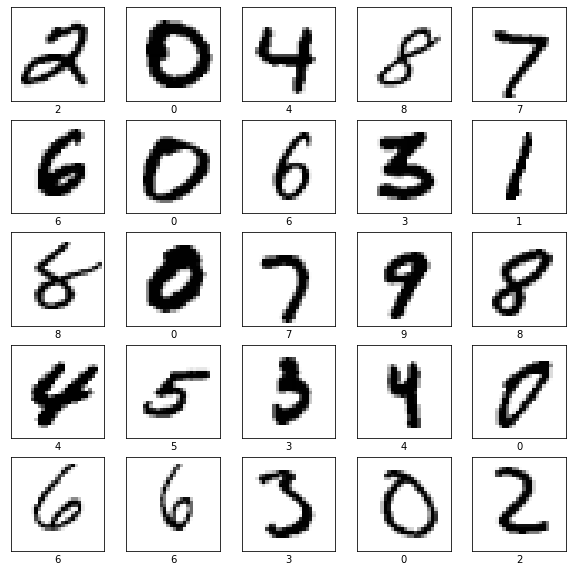

In [ ]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_data.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(labels[label])
  i += 1

plt.show()

BATCH = 32
train_data = train_data.repeat().shuffle(num_train_samples).batch(BATCH)
test_data = test_data.batch(BATCH)

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28,1)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation= tf.nn.softmax)
])


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, epochs=25, steps_per_epoch = math.ceil(num_train_samples / BATCH))


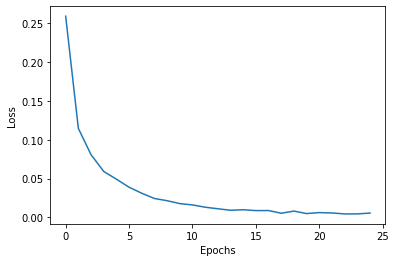

In [ ]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history['loss'])
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_data, steps = math.ceil(num_test_samples/BATCH))
print('accuracy: {:2f}'.format(test_acc))
print('loss: {:2f}'.format(test_loss))

313/313 [==============================] - 1s 2ms/step - loss: 0.1228 - accuracy: 0.9784
accuracy: 0.978400
loss: 0.122841


# 2) Problema de Regressão

### Comentário

*No desenvolvimento do relatório, tive muita dificuldade no tratamento dos datasets, e só consegui concluir os testes de forma satisfatória quando, de forma manual, identifiquei e removi um Outlier que estava causando uma explosão no gradiente.*

In [133]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [134]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


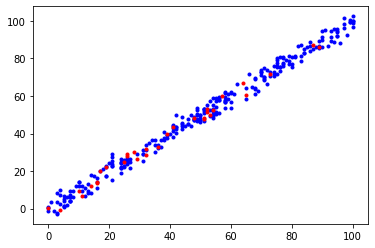

In [135]:
from sklearn.model_selection import train_test_split

dataset = pd.read_csv("./train (1).csv").values
x = dataset[:,0]
y = dataset[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

plt.plot(x_train, y_train, '.', color='blue')
plt.plot(x_test, y_test, '.', color='red')
plt.show()


In [ ]:
layer1 = tf.keras.layers.Dense(units=1, input_shape=[1], activation="linear")
model = tf.keras.Sequential([layer1])

opt = Adam(learning_rate=0.01)

model.compile(loss='mean_squared_error', optimizer = opt)

print(x_train)

history = model.fit(x_train, y_train, epochs=100, batch_size = 1, verbose=True)

print("Network parameters: {}".format(model.get_weights()))

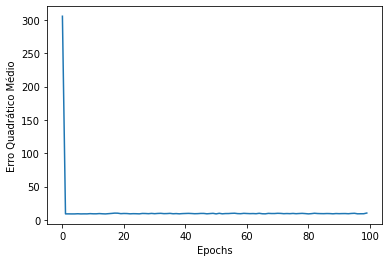

In [137]:
plt.xlabel("Epochs")
plt.ylabel("Erro Quadrático Médio")
plt.plot(history.history['loss'])
plt.show()

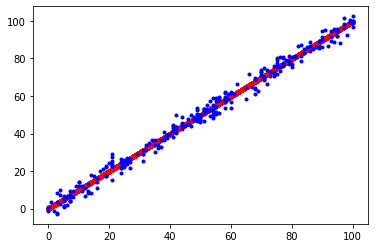

1/1 [==============================] - 0s 62ms/step - loss: 6.2192


In [138]:
x_res = np.arange(x_train.min(),x_train.max(),0.01)
y_res = model.predict(x_res)
plt.plot(x_res, y_res, '.', color='red')
plt.plot(x_train, y_train, '.', color='blue')
plt.show()

test_loss = model.evaluate(x_test, y_test)